# **Sales Data Analysis**
---

## Overview
This notebook analyzes agricultural product sales data from Farmerline for the year 2023. The analysis explores sales patterns, customer behavior, and product performance across different regions in Ghana.

### Objectives:
- Clean and prepare the sales data for analysis
- Identify sales trends across time periods (days, months)
- Analyze product performance and regional distribution
- Examine customer repurchase behavior
- Visualize key insights through charts and graphs

### Data Description:
The dataset contains information about agricultural product sales including:
- Products: Seeds (maize, soyabean, tomato), Fertilizers (NPK, Ammonia Sulphate), and Weedicide (Asaase Wura)
- Sales metrics: Quantity, Unit Price, Order Date
- Customer information: Region (Ashanti, Volta, Eastern, Western, Northern)
- Customer retention: Whether customers purchased again (Yes/No)
---

## Setup and Data Loading

First, we'll import the necessary libraries for data manipulation, visualization, and analysis. We'll use:
- pandas for data manipulation
- matplotlib and seaborn for visualization
- sklearn for potential machine learning applications

In [1]:
# Data loading and manipulation
import pandas as pd

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# ML modelling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Filter warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# load the dataset
df = pd.read_csv('data/raw_data.csv')

## Data Exploration and Understanding

Let's first understand the structure and content of our dataset. We'll examine:
- The first few rows to understand the data format
- The shape of the dataset (rows and columns)
- Column names and data types
- Presence of duplicates and missing values

### The first few rows to understand the data format

In [3]:
# first few rows
df.head()

,OrderID,Product,Category,Quantity,UnitPrice (GHS),OrderDate,CustomerRegion,PurchasedAgain
0,ORD0001,Asaase Wura,Weedicide,39.0,81.69,2023-09-28,Volta,No
1,ORD0002,NPK,Fertilizer,43.0,80.17,2023-01-21,Western,No
2,ORD0003,Asaase Wura,Weedicide,39.0,50.12,2023-08-03,Ashanti,No
3,ORD0004,Maize,Seed,11.0,51.33,2023-04-10,Ashanti region,Yes
4,ORD0005,NPK,Fertilizer,40.0,73.73,2023-05-30,Eastern,Yes


### The shape of the dataset (rows and columns)

In [4]:
# Number of rows and columns
df.shape

(300, 8)

### Column names and data types

In [5]:
# Inspect column names
df.columns

Index(['OrderID', 'Product', 'Category', 'Quantity', 'UnitPrice (GHS)',
       'OrderDate', 'CustomerRegion', 'PurchasedAgain'],
      dtype='object')

### Presence of duplicates and missing values

In [6]:
# number of duplicate values
df.duplicated().sum()

np.int64(0)

* There are no duplicate rows.

---
## Data Cleaning and Preprocessing

The data requires several cleaning steps:
1. Handling missing values
2. Standardizing product names (e.g., different spellings of "maize")
3. Standardizing region names (e.g., "Ashanti region", "ashanti", "ASHANTI")
4. Converting data types (dates to datetime, quantities to integers)

### Handling missing values

In [7]:
# Inspect for empty cells
df.isna().sum()

OrderID            0
Product            2
Category           0
Quantity           3
UnitPrice (GHS)    2
OrderDate          1
CustomerRegion     3
PurchasedAgain     0
dtype: int64

* There are a couple of empty cells being inspected below.

In [8]:
# Inspect empty cell rows
empty_df = df[df['Product'].isna() | df['Quantity'].isna() | df['UnitPrice (GHS)'].isna() | df['OrderDate'].isna() | df['CustomerRegion'].isna()]
empty_df

,OrderID,Product,Category,Quantity,UnitPrice (GHS),OrderDate,CustomerRegion,PurchasedAgain
5,ORD0006,NPK,Fertilizer,2.0,NaN,2023-10-21,Eastern,No
70,ORD0071,NaN,Seed,3.0,82.86,2023-05-28,NaN,No
75,ORD0076,NPK,Fertilizer,NaN,69.40,2023-12-12,Ashanti,Yes
104,ORD0105,Maize,Seed,42.0,94.25,2023-02-27,NaN,No
130,ORD0131,Ammonia Sulphate,Fertilizer,NaN,26.46,2023-08-25,Northern,No
255,ORD0256,Asaase Wura,Weedicide,23.0,57.81,2023-12-31,NaN,Yes
262,ORD0263,Ammonia Sulphate,Fertilizer,NaN,NaN,2023-05-06,Western,Yes
271,ORD0272,Asaase Wura,Weedicide,45.0,39.73,NaN,Western,Yes
294,ORD0295,NaN,Seed,35.0,41.40,2023-11-01,Western,Yes


* Export empty cells dataset for further investigation

In [9]:
# export n/a rows
empty_df.to_csv('data/null_values_data.csv')

### Remove n/a rows

In [10]:
df1 = df.dropna()
df1.isna().sum()

OrderID            0
Product            0
Category           0
Quantity           0
UnitPrice (GHS)    0
OrderDate          0
CustomerRegion     0
PurchasedAgain     0
dtype: int64

In [11]:
df1.describe()

,Quantity,UnitPrice (GHS)
count,291.000000,291.000000
mean,25.072165,57.738522
std,14.483937,26.176730
min,1.000000,10.240000
25%,12.000000,33.985000
50%,25.000000,59.670000
75%,37.000000,79.375000
max,49.000000,99.620000


In [12]:
df1.describe(include="O")

,OrderID,Product,Category,OrderDate,CustomerRegion,PurchasedAgain
count,291,291,291,291,291,291
unique,291,8,3,199,13,2
top,ORD0300,Asaase Wura,Fertilizer,2023-05-25,Western,Yes
freq,1,77,109,4,59,178


### Standardizing product names (e.g., different spellings of "maize")

In [13]:
cols = ['Product', 'Category', 'CustomerRegion', 'PurchasedAgain']
for col in cols:
    print(f"{col:>15}: {df1[col].unique()}")

        Product: ['Asaase Wura' 'NPK' 'Maize' 'soyabean' 'tomato' 'Ammonia Sulphate'
 'MAIZE' 'maize']
       Category: ['Weedicide' 'Fertilizer' 'Seed']
 CustomerRegion: ['Volta' 'Western' 'Ashanti' 'Ashanti region' 'Eastern' 'Eastern Region'
 'eastern reg' 'Northern' 'Volta_reg' 'ashanti' 'ASHANTI' 'eastern region'
 'Volta_region']
 PurchasedAgain: ['No' 'Yes']


### Standardizing region names (e.g., "Ashanti region", "ashanti", "ASHANTI")

In [14]:
df1['Product'] = df1['Product'].apply(lambda x: 'maize' if str(x).lower() == 'maize' else x)
df1['Product'].unique()

array(['Asaase Wura', 'NPK', 'maize', 'soyabean', 'tomato',
       'Ammonia Sulphate'], dtype=object)

In [15]:
df1['CustomerRegion'] = df1['CustomerRegion'].apply(lambda x: 'Ashanti' if x == 'Ashanti region' or x == 'ashanti' or x ==  'ASHANTI'
                                                  else 'Volta' if x == 'Volta_reg' or x == 'Volta_region'
                                                  else 'Eastern' if x == 'Eastern Region' or x == 'eastern reg' or x == 'eastern region'
                                                  else x)

df1['CustomerRegion'].unique()

array(['Volta', 'Western', 'Ashanti', 'Eastern', 'Northern'], dtype=object)

In [16]:
df1.describe(include="O")

,OrderID,Product,Category,OrderDate,CustomerRegion,PurchasedAgain
count,291,291,291,291,291,291
unique,291,6,3,199,5,2
top,ORD0300,Asaase Wura,Fertilizer,2023-05-25,Ashanti,Yes
freq,1,77,109,4,66,178


### Converting data types (dates to datetime, quantities to integers)

In [17]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 0 to 299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   OrderID          291 non-null    object 
 1   Product          291 non-null    object 
 2   Category         291 non-null    object 
 3   Quantity         291 non-null    float64
 4   UnitPrice (GHS)  291 non-null    float64
 5   OrderDate        291 non-null    object 
 6   CustomerRegion   291 non-null    object 
 7   PurchasedAgain   291 non-null    object 
dtypes: float64(2), object(6)
memory usage: 20.5+ KB


In [18]:
df1['OrderDate'] = pd.to_datetime(df1['OrderDate'])
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 291 entries, 0 to 299
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderID          291 non-null    object        
 1   Product          291 non-null    object        
 2   Category         291 non-null    object        
 3   Quantity         291 non-null    float64       
 4   UnitPrice (GHS)  291 non-null    float64       
 5   OrderDate        291 non-null    datetime64[ns]
 6   CustomerRegion   291 non-null    object        
 7   PurchasedAgain   291 non-null    object        
dtypes: datetime64[ns](1), float64(2), object(5)
memory usage: 20.5+ KB


In [19]:
df1.head()

,OrderID,Product,Category,Quantity,UnitPrice (GHS),OrderDate,CustomerRegion,PurchasedAgain
0,ORD0001,Asaase Wura,Weedicide,39.0,81.69,2023-09-28,Volta,No
1,ORD0002,NPK,Fertilizer,43.0,80.17,2023-01-21,Western,No
2,ORD0003,Asaase Wura,Weedicide,39.0,50.12,2023-08-03,Ashanti,No
3,ORD0004,maize,Seed,11.0,51.33,2023-04-10,Ashanti,Yes
4,ORD0005,NPK,Fertilizer,40.0,73.73,2023-05-30,Eastern,Yes


In [20]:
# Checking if there are quantities in decimals
df1[(df1['Quantity'] % 1) > 0]

,OrderID,Product,Category,Quantity,UnitPrice (GHS),OrderDate,CustomerRegion,PurchasedAgain


In [21]:
# Convert Quantity column to whole number
df1['Quantity'] = df1['Quantity'].astype('int')
df1.head();

In [22]:
df1.shape

(291, 8)

In [23]:
# Export the cleaned Dataset for Power BI visual
df1.to_csv('data/cleaned_data.csv')

---
## Feature Engineering

To enhance our analysis, we'll create additional features:
- Day of the week from OrderDate
- Month from OrderDate
- Year from OrderDate
- Sales Amount (Quantity × Unit Price)

These derived features will help us identify temporal patterns and financial performance.

### Day of the week

In [24]:
# create day of the week column
data = df1.copy()
data['Day'] = data['OrderDate'].dt.day_name()
data.head()

,OrderID,Product,Category,Quantity,UnitPrice (GHS),OrderDate,CustomerRegion,PurchasedAgain,Day
0,ORD0001,Asaase Wura,Weedicide,39,81.69,2023-09-28,Volta,No,Thursday
1,ORD0002,NPK,Fertilizer,43,80.17,2023-01-21,Western,No,Saturday
2,ORD0003,Asaase Wura,Weedicide,39,50.12,2023-08-03,Ashanti,No,Thursday
3,ORD0004,maize,Seed,11,51.33,2023-04-10,Ashanti,Yes,Monday
4,ORD0005,NPK,Fertilizer,40,73.73,2023-05-30,Eastern,Yes,Tuesday


In [25]:
# Maintain day order for sorting data
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['Day'] = pd.Categorical(data['Day'], categories=day_order, ordered=True)

### Month of the year

In [26]:
data['Month'] = data['OrderDate'].dt.month_name()
data.head()

,OrderID,Product,Category,Quantity,UnitPrice (GHS),OrderDate,CustomerRegion,PurchasedAgain,Day,Month
0,ORD0001,Asaase Wura,Weedicide,39,81.69,2023-09-28,Volta,No,Thursday,September
1,ORD0002,NPK,Fertilizer,43,80.17,2023-01-21,Western,No,Saturday,January
2,ORD0003,Asaase Wura,Weedicide,39,50.12,2023-08-03,Ashanti,No,Thursday,August
3,ORD0004,maize,Seed,11,51.33,2023-04-10,Ashanti,Yes,Monday,April
4,ORD0005,NPK,Fertilizer,40,73.73,2023-05-30,Eastern,Yes,Tuesday,May


In [27]:
data['Month'].unique()

array(['September', 'January', 'August', 'April', 'May', 'October',
       'February', 'July', 'June', 'November', 'December', 'March'],
      dtype=object)

In [28]:
# Maintain month order for sorting data
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

#### Inspect `Categories` column

In [29]:
data['Category'].unique()

array(['Weedicide', 'Fertilizer', 'Seed'], dtype=object)

### Year

In [30]:
# number of years
data['Year'] = data['OrderDate'].dt.year

In [31]:
data['Year'].nunique()

1

* Drop `Year` column since there's only one unique value there.

In [32]:
# drop `year` column
data = data.drop('Year', axis=1)

### Sales Amount (Quantity × Unit Price)

In [33]:
#sales amount per order
data['SalesAmount (GHS)'] = data['Quantity'] * data['UnitPrice (GHS)']
data.head()

,OrderID,Product,Category,Quantity,UnitPrice (GHS),OrderDate,CustomerRegion,PurchasedAgain,Day,Month,SalesAmount (GHS)
0,ORD0001,Asaase Wura,Weedicide,39,81.69,2023-09-28,Volta,No,Thursday,September,3185.91
1,ORD0002,NPK,Fertilizer,43,80.17,2023-01-21,Western,No,Saturday,January,3447.31
2,ORD0003,Asaase Wura,Weedicide,39,50.12,2023-08-03,Ashanti,No,Thursday,August,1954.68
3,ORD0004,maize,Seed,11,51.33,2023-04-10,Ashanti,Yes,Monday,April,564.63
4,ORD0005,NPK,Fertilizer,40,73.73,2023-05-30,Eastern,Yes,Tuesday,May,2949.20


---
## Exploratory Data Analysis

Now we'll explore patterns and trends in the data through visualizations and summary statistics. We'll analyze:
- Sales distribution by day of week
- Monthly sales trends
- Product performance
- Regional sales distribution
- Customer repurchase behavior

### Sales by Day of Week

This analysis shows how sales are distributed across different days of the week. This can help identify peak sales days and inform staffing or inventory decisions.

In [34]:
# Sales made according to day of the week
sales_by_day_of_week = data.groupby('Day', as_index=False).agg({'SalesAmount (GHS)': 'sum'})
sales_by_day_of_week

,Day,SalesAmount (GHS)
0,Monday,49504.49
1,Tuesday,54016.84
2,Wednesday,52215.85
3,Thursday,88012.62
4,Friday,51196.78
5,Saturday,48564.88
6,Sunday,67786.43


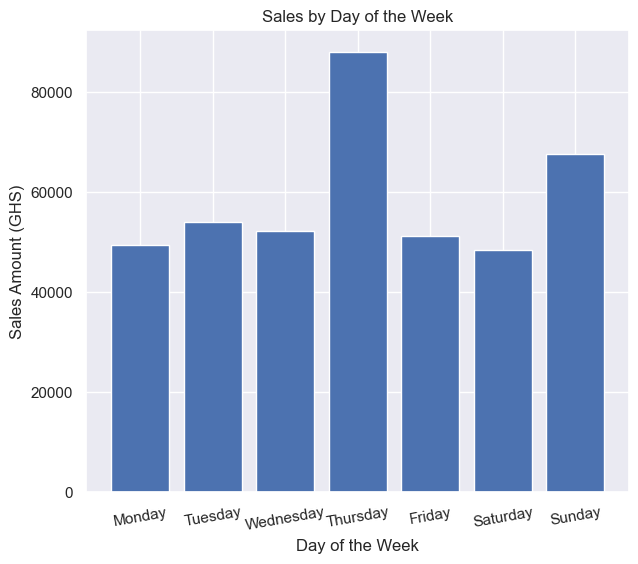

In [35]:
plt.figure(figsize=(7, 6))
plt.bar(sales_by_day_of_week['Day'], sales_by_day_of_week['SalesAmount (GHS)'])
plt.xticks(rotation=10)
plt.title('Sales by Day of the Week')
plt.ylabel('Sales Amount (GHS)')
plt.xlabel('Day of the Week')
plt.savefig('assets/Sales by Day of the Week.png');

---
### Monthly Sales Trends

Examining sales by month helps identify seasonal patterns and annual trends. This information is crucial for inventory planning and seasonal marketing campaigns.

In [36]:
# Monthly sales
sales_by_month = data.groupby('Month', as_index=False).agg({'SalesAmount (GHS)': 'sum'})
sales_by_month.sort_values(by='Month')

,Month,SalesAmount (GHS)
0,January,25616.30
1,February,32248.80
2,March,31858.32
3,April,34570.11
4,May,44964.65
5,June,34333.56
6,July,20929.91
7,August,53979.84
8,September,27694.11
9,October,37073.13


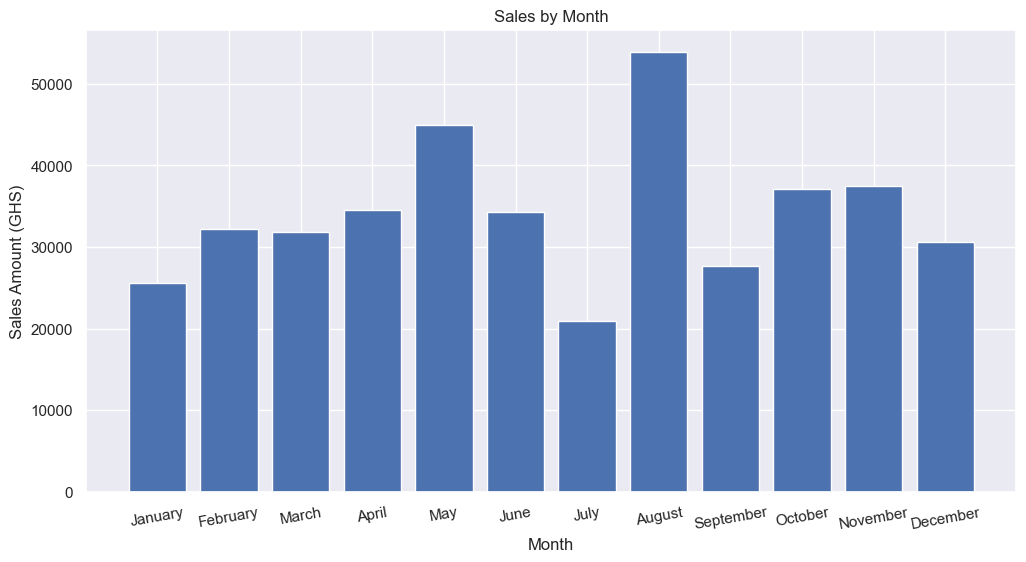

In [37]:
# Visualize the trend
plt.figure(figsize=(12, 6))
plt.bar(sales_by_month['Month'], sales_by_month['SalesAmount (GHS)'])
plt.xticks(rotation=10)
plt.title('Sales by Month')
plt.ylabel('Sales Amount (GHS)')
plt.xlabel('Month')
plt.savefig('assets/Sales by Month.png');

### Product Performance Analysis

This section analyzes which products generate the most revenue and how they perform across different regions and time periods.

In [38]:
# Sales by Product
sales_by_product = data.groupby('Product', as_index=False).agg({'SalesAmount (GHS)': 'sum'})
sales_by_product

,Product,SalesAmount (GHS)
0,Ammonia Sulphate,95008.79
1,Asaase Wura,110274.93
2,NPK,78115.43
3,maize,56159.68
4,soyabean,52595.67
5,tomato,19143.39


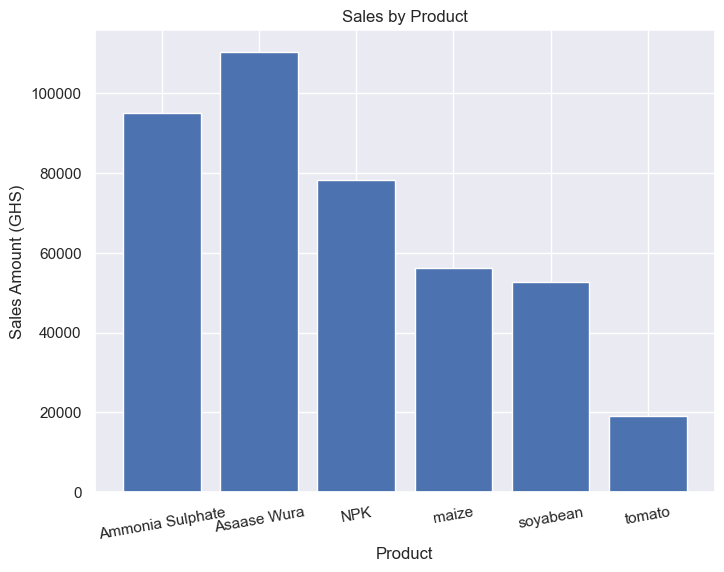

In [39]:
# Visualize product sales
plt.figure(figsize=(8, 6))
plt.bar(sales_by_product['Product'], sales_by_product['SalesAmount (GHS)'])
plt.xticks(rotation=10)
plt.title('Sales by Product')
plt.ylabel('Sales Amount (GHS)')
plt.xlabel('Product')
plt.savefig('assets/Sales by Product.png');

### Product Sales Trends Over Time

This visualization shows how different products perform across months, helping identify seasonal preferences for specific agricultural inputs.

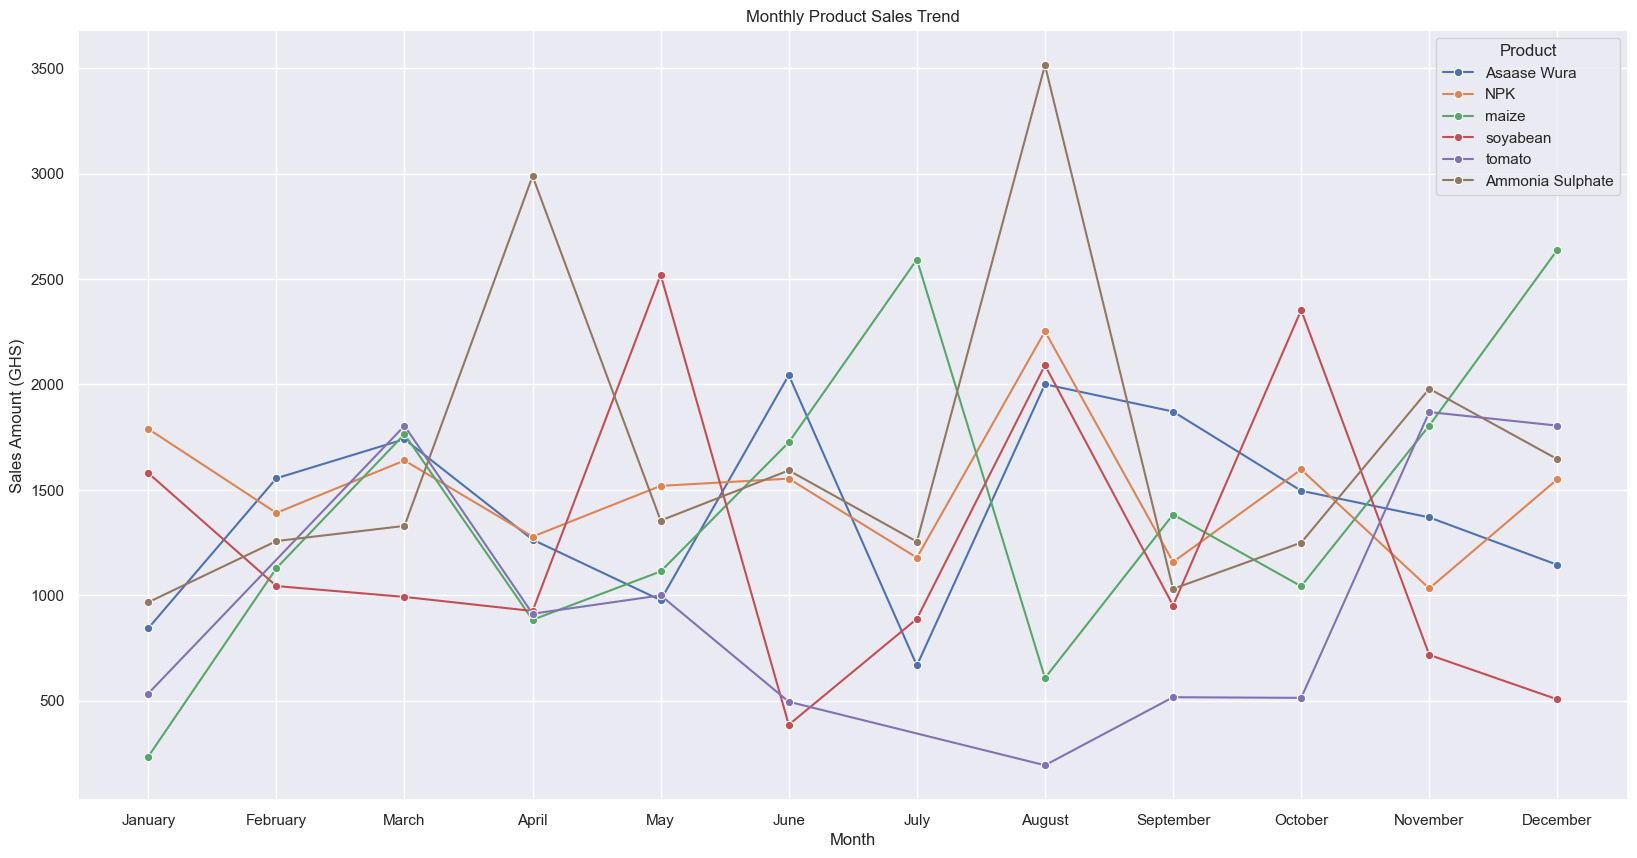

In [40]:
# Visualize
plt.figure(figsize=(20, 10))
sns.lineplot(data=data, x='Month', y='SalesAmount (GHS)', hue='Product', errorbar=None, marker='o')
plt.title('Monthly Product Sales Trend')
plt.ylabel('Sales Amount (GHS)')
plt.xlabel('Month')
plt.savefig('assets/Monthly Product Sales Trend.png');

### Category Sales Trends Over Time

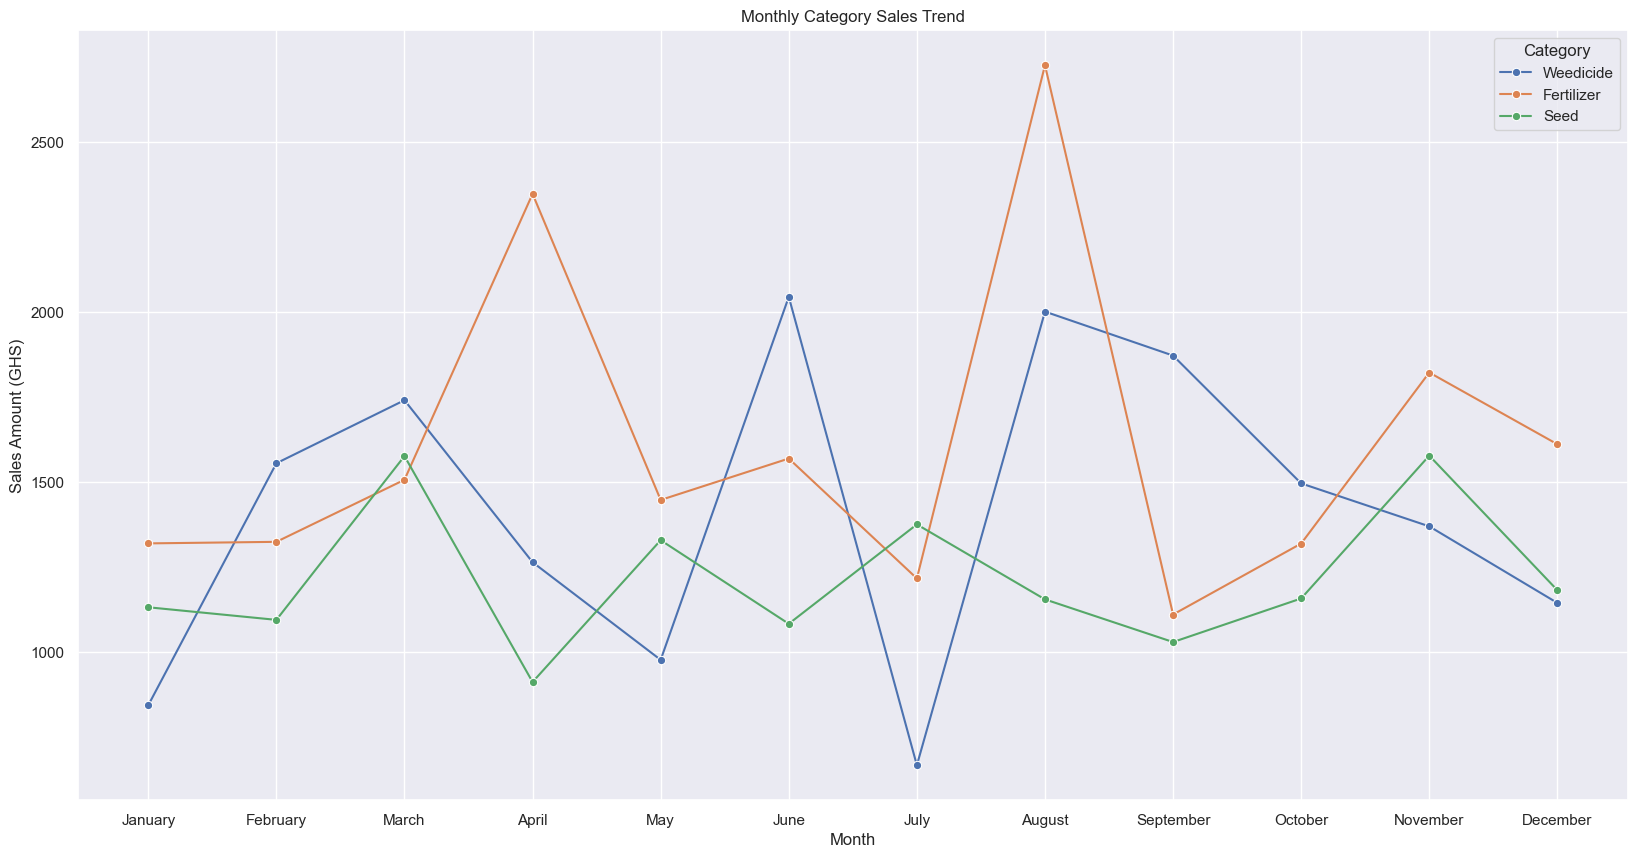

In [41]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=data, x='Month', y='SalesAmount (GHS)', hue='Category', errorbar=None, marker='o')
plt.title('Monthly Category Sales Trend')
plt.ylabel('Sales Amount (GHS)')
plt.xlabel('Month')
plt.savefig('assets/Monthly Category Sales Trend.png');

## Customer Retention Analysis

Understanding which products and regions have higher repurchase rates can inform customer retention strategies and product improvement initiatives.

In [42]:
# % of return customers
round(data.value_counts('PurchasedAgain', normalize=True)*100)

PurchasedAgain
Yes    61.0
No     39.0
Name: proportion, dtype: float64

In [43]:
# Return customer count % by Products
Product_returned_customers = data.groupby('Product', as_index=False)['PurchasedAgain'].value_counts(normalize=True)
Product_returned_customers

,Product,PurchasedAgain,proportion
0,Ammonia Sulphate,Yes,0.586207
1,Ammonia Sulphate,No,0.413793
2,Asaase Wura,Yes,0.532468
3,Asaase Wura,No,0.467532
4,NPK,Yes,0.627451
5,NPK,No,0.372549
6,maize,Yes,0.738095
7,maize,No,0.261905
8,soyabean,Yes,0.707317
9,soyabean,No,0.292683


* This shows the percentage of customers that returned to the make another purchase partitioned by products.

In [44]:
# Return customer count % by Category
Category_returned_customers = data.groupby('Category', as_index=False)['PurchasedAgain'].value_counts(normalize=True)
Category_returned_customers

,Category,PurchasedAgain,proportion
0,Fertilizer,Yes,0.605505
1,Fertilizer,No,0.394495
2,Seed,Yes,0.676190
3,Seed,No,0.323810
4,Weedicide,Yes,0.532468
5,Weedicide,No,0.467532


* This shows the percentage of customers that returned to the make another purchase partitioned by category.

### Average Price and quantity

In [45]:
# Average order quantitiy
avg_order_qty = round(data['Quantity'].mean())

# Average unit price
avg_unit_price = round(data['UnitPrice (GHS)'].mean(), 2)

print(f'Average order quantity: {avg_order_qty} units\nAverage unit price: GHS {avg_unit_price}')

Average order quantity: 25 units
Average unit price: GHS 57.74


---
## Data Preprocessing

Before training our model, we need to:
1. Encode categorical variables
2. Split the data into features (X) and target (y)
3. Divide into training and testing sets
4. Scale numerical features

In [46]:
data.head()

,OrderID,Product,Category,Quantity,UnitPrice (GHS),OrderDate,CustomerRegion,PurchasedAgain,Day,Month,SalesAmount (GHS)
0,ORD0001,Asaase Wura,Weedicide,39,81.69,2023-09-28,Volta,No,Thursday,September,3185.91
1,ORD0002,NPK,Fertilizer,43,80.17,2023-01-21,Western,No,Saturday,January,3447.31
2,ORD0003,Asaase Wura,Weedicide,39,50.12,2023-08-03,Ashanti,No,Thursday,August,1954.68
3,ORD0004,maize,Seed,11,51.33,2023-04-10,Ashanti,Yes,Monday,April,564.63
4,ORD0005,NPK,Fertilizer,40,73.73,2023-05-30,Eastern,Yes,Tuesday,May,2949.20


### Remove unnecesary columns for modelling

In [47]:
data['DayOfMonth'] = data['OrderDate'].dt.day
data['DayOfMonth']

0      28
1      21
2       3
3      10
4      30
       ..
295    24
296    17
297     4
298     1
299    27
Name: DayOfMonth, Length: 291, dtype: int32

In [48]:
data['Month_N'] = data['OrderDate'].dt.month
data['Month_N']

0       9
1       1
2       8
3       4
4       5
       ..
295     8
296     5
297     2
298     3
299    12
Name: Month_N, Length: 291, dtype: int32

In [49]:
df_lg = data.drop(columns=['OrderID', 'OrderDate'], axis=1)
df_lg.head()

,Product,Category,Quantity,UnitPrice (GHS),CustomerRegion,PurchasedAgain,Day,Month,SalesAmount (GHS),DayOfMonth,Month_N
0,Asaase Wura,Weedicide,39,81.69,Volta,No,Thursday,September,3185.91,28,9
1,NPK,Fertilizer,43,80.17,Western,No,Saturday,January,3447.31,21,1
2,Asaase Wura,Weedicide,39,50.12,Ashanti,No,Thursday,August,1954.68,3,8
3,maize,Seed,11,51.33,Ashanti,Yes,Monday,April,564.63,10,4
4,NPK,Fertilizer,40,73.73,Eastern,Yes,Tuesday,May,2949.20,30,5


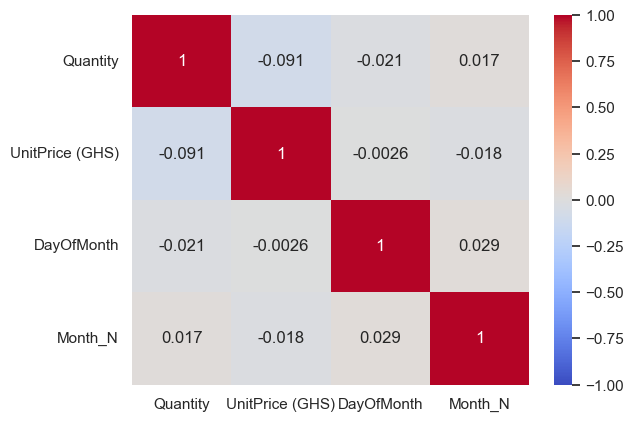

In [50]:
df_cor = data[['Quantity', 'UnitPrice (GHS)', 'DayOfMonth', 'Month_N']].corr()

sns.heatmap(df_cor, cmap='coolwarm', annot=True, vmax=1, vmin=-1);

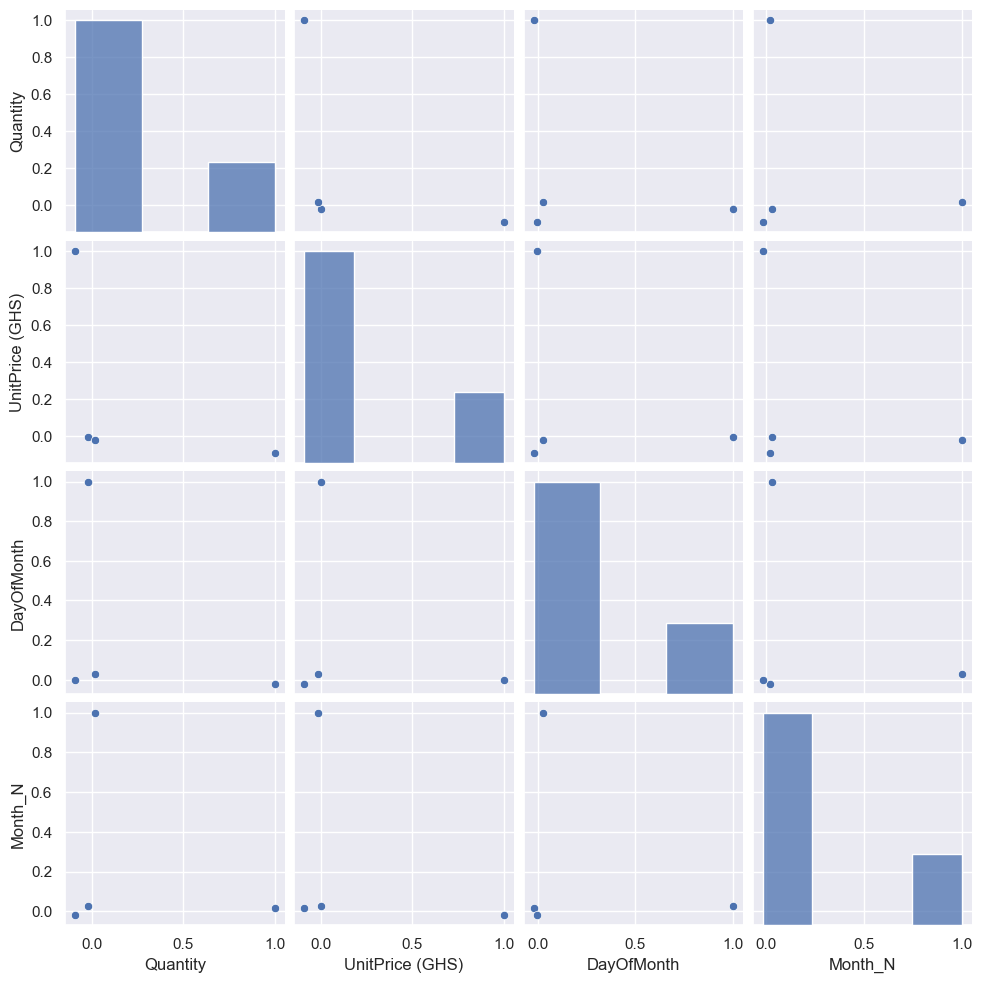

In [51]:
sns.pairplot(df_cor)

In [52]:
df_lg = data.drop(columns=['OrderID', 'OrderDate', 'Month'], axis=1)
df_lg.head()

,Product,Category,Quantity,UnitPrice (GHS),CustomerRegion,PurchasedAgain,Day,SalesAmount (GHS),DayOfMonth,Month_N
0,Asaase Wura,Weedicide,39,81.69,Volta,No,Thursday,3185.91,28,9
1,NPK,Fertilizer,43,80.17,Western,No,Saturday,3447.31,21,1
2,Asaase Wura,Weedicide,39,50.12,Ashanti,No,Thursday,1954.68,3,8
3,maize,Seed,11,51.33,Ashanti,Yes,Monday,564.63,10,4
4,NPK,Fertilizer,40,73.73,Eastern,Yes,Tuesday,2949.20,30,5


### Encode categorical variables

In [53]:
df_lg['PurchasedAgain'] = df_lg['PurchasedAgain'].map({'Yes': 1, 'No': 0})
df_lg.head()

,Product,Category,Quantity,UnitPrice (GHS),CustomerRegion,PurchasedAgain,Day,SalesAmount (GHS),DayOfMonth,Month_N
0,Asaase Wura,Weedicide,39,81.69,Volta,0,Thursday,3185.91,28,9
1,NPK,Fertilizer,43,80.17,Western,0,Saturday,3447.31,21,1
2,Asaase Wura,Weedicide,39,50.12,Ashanti,0,Thursday,1954.68,3,8
3,maize,Seed,11,51.33,Ashanti,1,Monday,564.63,10,4
4,NPK,Fertilizer,40,73.73,Eastern,1,Tuesday,2949.20,30,5


In [54]:
df_lg = pd.get_dummies(df_lg, drop_first=True)
df_lg.head()

,Quantity,UnitPrice (GHS),PurchasedAgain,SalesAmount (GHS),DayOfMonth,Month_N,Product_Asaase Wura,Product_NPK,Product_maize,Product_soyabean,...,CustomerRegion_Eastern,CustomerRegion_Northern,CustomerRegion_Volta,CustomerRegion_Western,Day_Tuesday,Day_Wednesday,Day_Thursday,Day_Friday,Day_Saturday,Day_Sunday
0,39,81.69,0,3185.91,28,9,True,False,False,False,...,False,False,True,False,False,False,True,False,False,False
1,43,80.17,0,3447.31,21,1,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,39,50.12,0,1954.68,3,8,True,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3,11,51.33,1,564.63,10,4,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,40,73.73,1,2949.20,30,5,False,True,False,False,...,True,False,False,False,True,False,False,False,False,False


In [55]:
# Convert boolean columns to integers (0, 1)
bool_cols = df_lg.select_dtypes(include='bool').columns
df_lg[bool_cols] = df_lg[bool_cols].astype('int')
df_lg.head()

,Quantity,UnitPrice (GHS),PurchasedAgain,SalesAmount (GHS),DayOfMonth,Month_N,Product_Asaase Wura,Product_NPK,Product_maize,Product_soyabean,...,CustomerRegion_Eastern,CustomerRegion_Northern,CustomerRegion_Volta,CustomerRegion_Western,Day_Tuesday,Day_Wednesday,Day_Thursday,Day_Friday,Day_Saturday,Day_Sunday
0,39,81.69,0,3185.91,28,9,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,43,80.17,0,3447.31,21,1,0,1,0,0,...,0,0,0,1,0,0,0,0,1,0
2,39,50.12,0,1954.68,3,8,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,11,51.33,1,564.63,10,4,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,40,73.73,1,2949.20,30,5,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0


### Split the data into features (X) and target (y)

In [56]:
# Split data X and y
X = df_lg.drop('PurchasedAgain', axis=1)
y = df_lg['PurchasedAgain']

### Divide into training and testing sets

In [57]:
# Split data into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Scale numerical features

In [58]:
# Standardize the data before training
scaler = StandardScaler()

# scale training data
X_train_scaled = scaler.fit_transform(X_train)

# scale testing data
X_test_scaled = scaler.fit_transform(X_test)

* Moved on with the original data since the model's performance reduced on the scaled data.

---
## Model Selection and Training

For predicting customer repurchase behavior (a binary classification problem):

**Logistic Regression**: A simple baseline model that provides good interpretability

In [59]:
# Train the model
lg = LogisticRegression(max_iter=1000)
model = lg.fit(X_train_scaled, y_train)

In [60]:
# Make predictions
y_pred = model.predict(X_test_scaled)

In [61]:
# Evaluate model performance
precision = round(precision_score(y_test, y_pred), 2)
accuracy = round(accuracy_score(y_test, y_pred), 2)

print(f'Precision: {precision}\nAccuracy: {accuracy}')

Precision: 0.65
Accuracy: 0.63


* **Precision**: The model is able to predict correctly, 65% of the times that customers will make another purchase.
* **Accuracy**: The model is able to predict correctly, 63% of the times that customers will either make another purchase or not.
---

**Insights**
1. These scores are low and may be highly attributed to the amount of data available for training the model.
2. Certain features could be helpful to improve the performance of the model if included (e.g. customer service).

In [62]:
# prediction probability
print(model.predict_proba(X_test)[:, 1])

[1.         1.         1.         1.         0.99999979 1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.99999845 1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.        ]


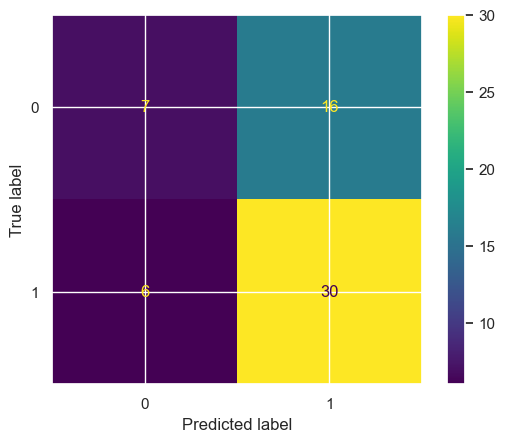

In [63]:
# Construct confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Confusion Matrix Display
cm_disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)

# display the confusion matrix
cm_disp.plot()

# save confusion matrix display
plt.savefig('assets/cm_disp.png');

**Interpretation:**
- 6 true negatives: correctly predicted 0
- 30 true positives: correctly predicted 1
- 16 false positives: predicted 1, but it was 0
- 7 false negatives: predicted 0, but it was 1
---

2. **Random Forest**: A model that uses classification and ensemble techniques.

In [64]:
# Import model package
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

In [65]:
# train the model
r_model = rfc.fit(X_train, y_train)

In [66]:
# make predictions
ry_pred = r_model.predict(X_test)

In [67]:
# Evaluate model performance
r_precision = round(precision_score(y_test, ry_pred), 2)
r_accuracy = round(accuracy_score(y_test, ry_pred), 2)

print(f'Precision: {r_precision}\nAccuracy: {r_accuracy}')

Precision: 0.65
Accuracy: 0.64


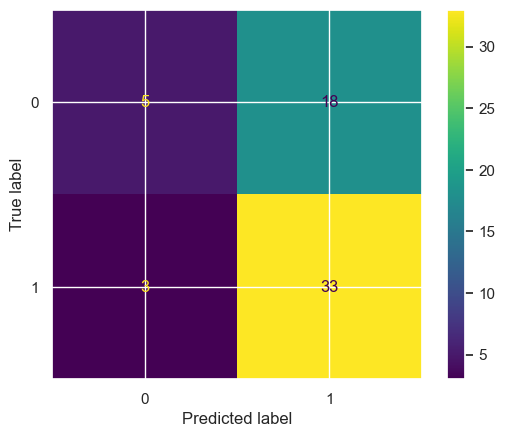

In [68]:
# Construct confusion matrix
rcm = confusion_matrix(y_test, ry_pred, labels=r_model.classes_)

# Confusion Matrix Display
rcm_disp = ConfusionMatrixDisplay(confusion_matrix=rcm, display_labels=r_model.classes_)

# display the confusion matrix
rcm_disp.plot()

# save confusion matrix display
plt.savefig('rcm_disp.png');

**Interpretation:**
- 3 true negatives: correctly predicted 0
- 33 true positives: correctly predicted 1
- 18 false positives: predicted 1, but it was 0
- 6 false negatives: predicted 0, but it was 1
---

In [69]:
# dataframe of the performance of the two models
performance = pd.DataFrame({'Model': ['Linear Regression', 'Random Forest'],
                           'Precision': [precision, r_precision],
                           'Accuracy': [accuracy, r_accuracy]})
performance

,Model,Precision,Accuracy
0,Linear Regression,0.65,0.63
1,Random Forest,0.65,0.64


## Key Insights and Conclusions

From our analysis of Farmerline's sales data, we can draw several important conclusions:

1. **Temporal Patterns**: 
   - Sales peak on `Thursdays` and `Sundays`. Stocks and related resources need to be regularly checked and made ready on the previous day.
   - May and August are two major harvest periods where sales are highest. This may be as a result of two major rainy patterns that usually occur in March-April and June-July with `Ammonia Sulphate` being the best performing product during this period.

2. **Product Performance**:
   - `Ammonia Sulphate` seems to perform best during `April` and `August`.
   - Sales for `soyabean` rises in `May` and `maize` in `July` and `December`.
   - The best performing products in `Assase Wura`. Its sales are highest in `June` and `August`.
  
---

## Next Steps and Recommendations

Based on these findings, potential next steps include:

1. **Further Analysis**: 
   - Deeper dive into high-performing products and regions
   - Price elasticity analysis
   - Customer segmentation

2. **Business Recommendations**:
   - Inventory optimization based on temporal patterns
   - Targeted marketing strategies for regions with low repurchase rates
   - Product bundling opportunities based on performance patterns

3. **Data Collection Improvements**:
   - Additional customer demographics
   - More granular location data
   - Cost information for profitability analysis